In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
import torch
import glob2, numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Projects/BioDiversity Project

/content/drive/My Drive/Colab Projects/BioDiversity Project


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_dir = "final"

In [ ]:
#dls = dblock.dataloaders(df, bs=64)  # Set your batch size (adjust to your needs)

In [ ]:
from PIL import ImageFilter
from PIL import ImageEnhance  # Import ImageFilter from PIL

# Define a custom function to apply night vision-style augmentation
def night_vision_augmentation(x: PIL.Image.Image):
    # Apply various image processing techniques to simulate night vision
    # You can adjust these transformations as needed to achieve the desired effect
    x = x.filter(ImageFilter.BLUR)
    x = ImageEnhance.Brightness(x).enhance(0.7)
    x = ImageEnhance.Contrast(x).enhance(1.5)
    x = x.filter(ImageFilter.EDGE_ENHANCE)
    x = x.convert('L')  # Convert to grayscale

    return x

# Define a function to apply night vision augmentation with a specified probability
def apply_night_vision(x: PIL.Image.Image, p: float = 0.3):
    if random.random() < p:
        return night_vision_augmentation(x)
    return x

# Modify the DataBlock to include night vision-style augmentation with 30% probability
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[
        *aug_transforms(size=224, max_warp=0),
        Normalize.from_stats(*imagenet_stats),
        apply_night_vision  # Apply night vision-style augmentation with 30% probability
    ]
)

# Create DataLoaders with the mixed dataset
dls = dblock.dataloaders(data_dir, bs=32)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[
        *aug_transforms(size=224, max_warp=0),
        Normalize.from_stats(*imagenet_stats),
    ]
)

In [ ]:
dls = dblock.dataloaders(data_dir, bs=32)

In [ ]:
model_path = "models"

In [ ]:
from fastai import metrics
model = vision_learner(dls, resnet152, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.load("fine-tuned-v1")

In [ ]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.438674,0.897497,0.255307,0.744693,50:23


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.073206,0.807778,0.244693,0.755307,08:28
1,1.004337,0.785980,0.246462,0.753538,08:27
2,0.689374,0.656442,0.206368,0.793632,08:24
3,0.426001,0.520068,0.159788,0.840212,08:25
4,0.275546,0.493620,0.151533,0.848467,08:43


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.419018,0.255785,0.079740,0.920260,09:22


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.454758,0.277235,0.099232,0.900768,10:21


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.save("fine-tuned-v2")

Path('models/fine-tuned-v2.pth')

In [ ]:
model.export("mammals-of-india-v0.pkl")

# Other

Trying to clean the images that caused loss to the model

In [ ]:
from fastai.interpret import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

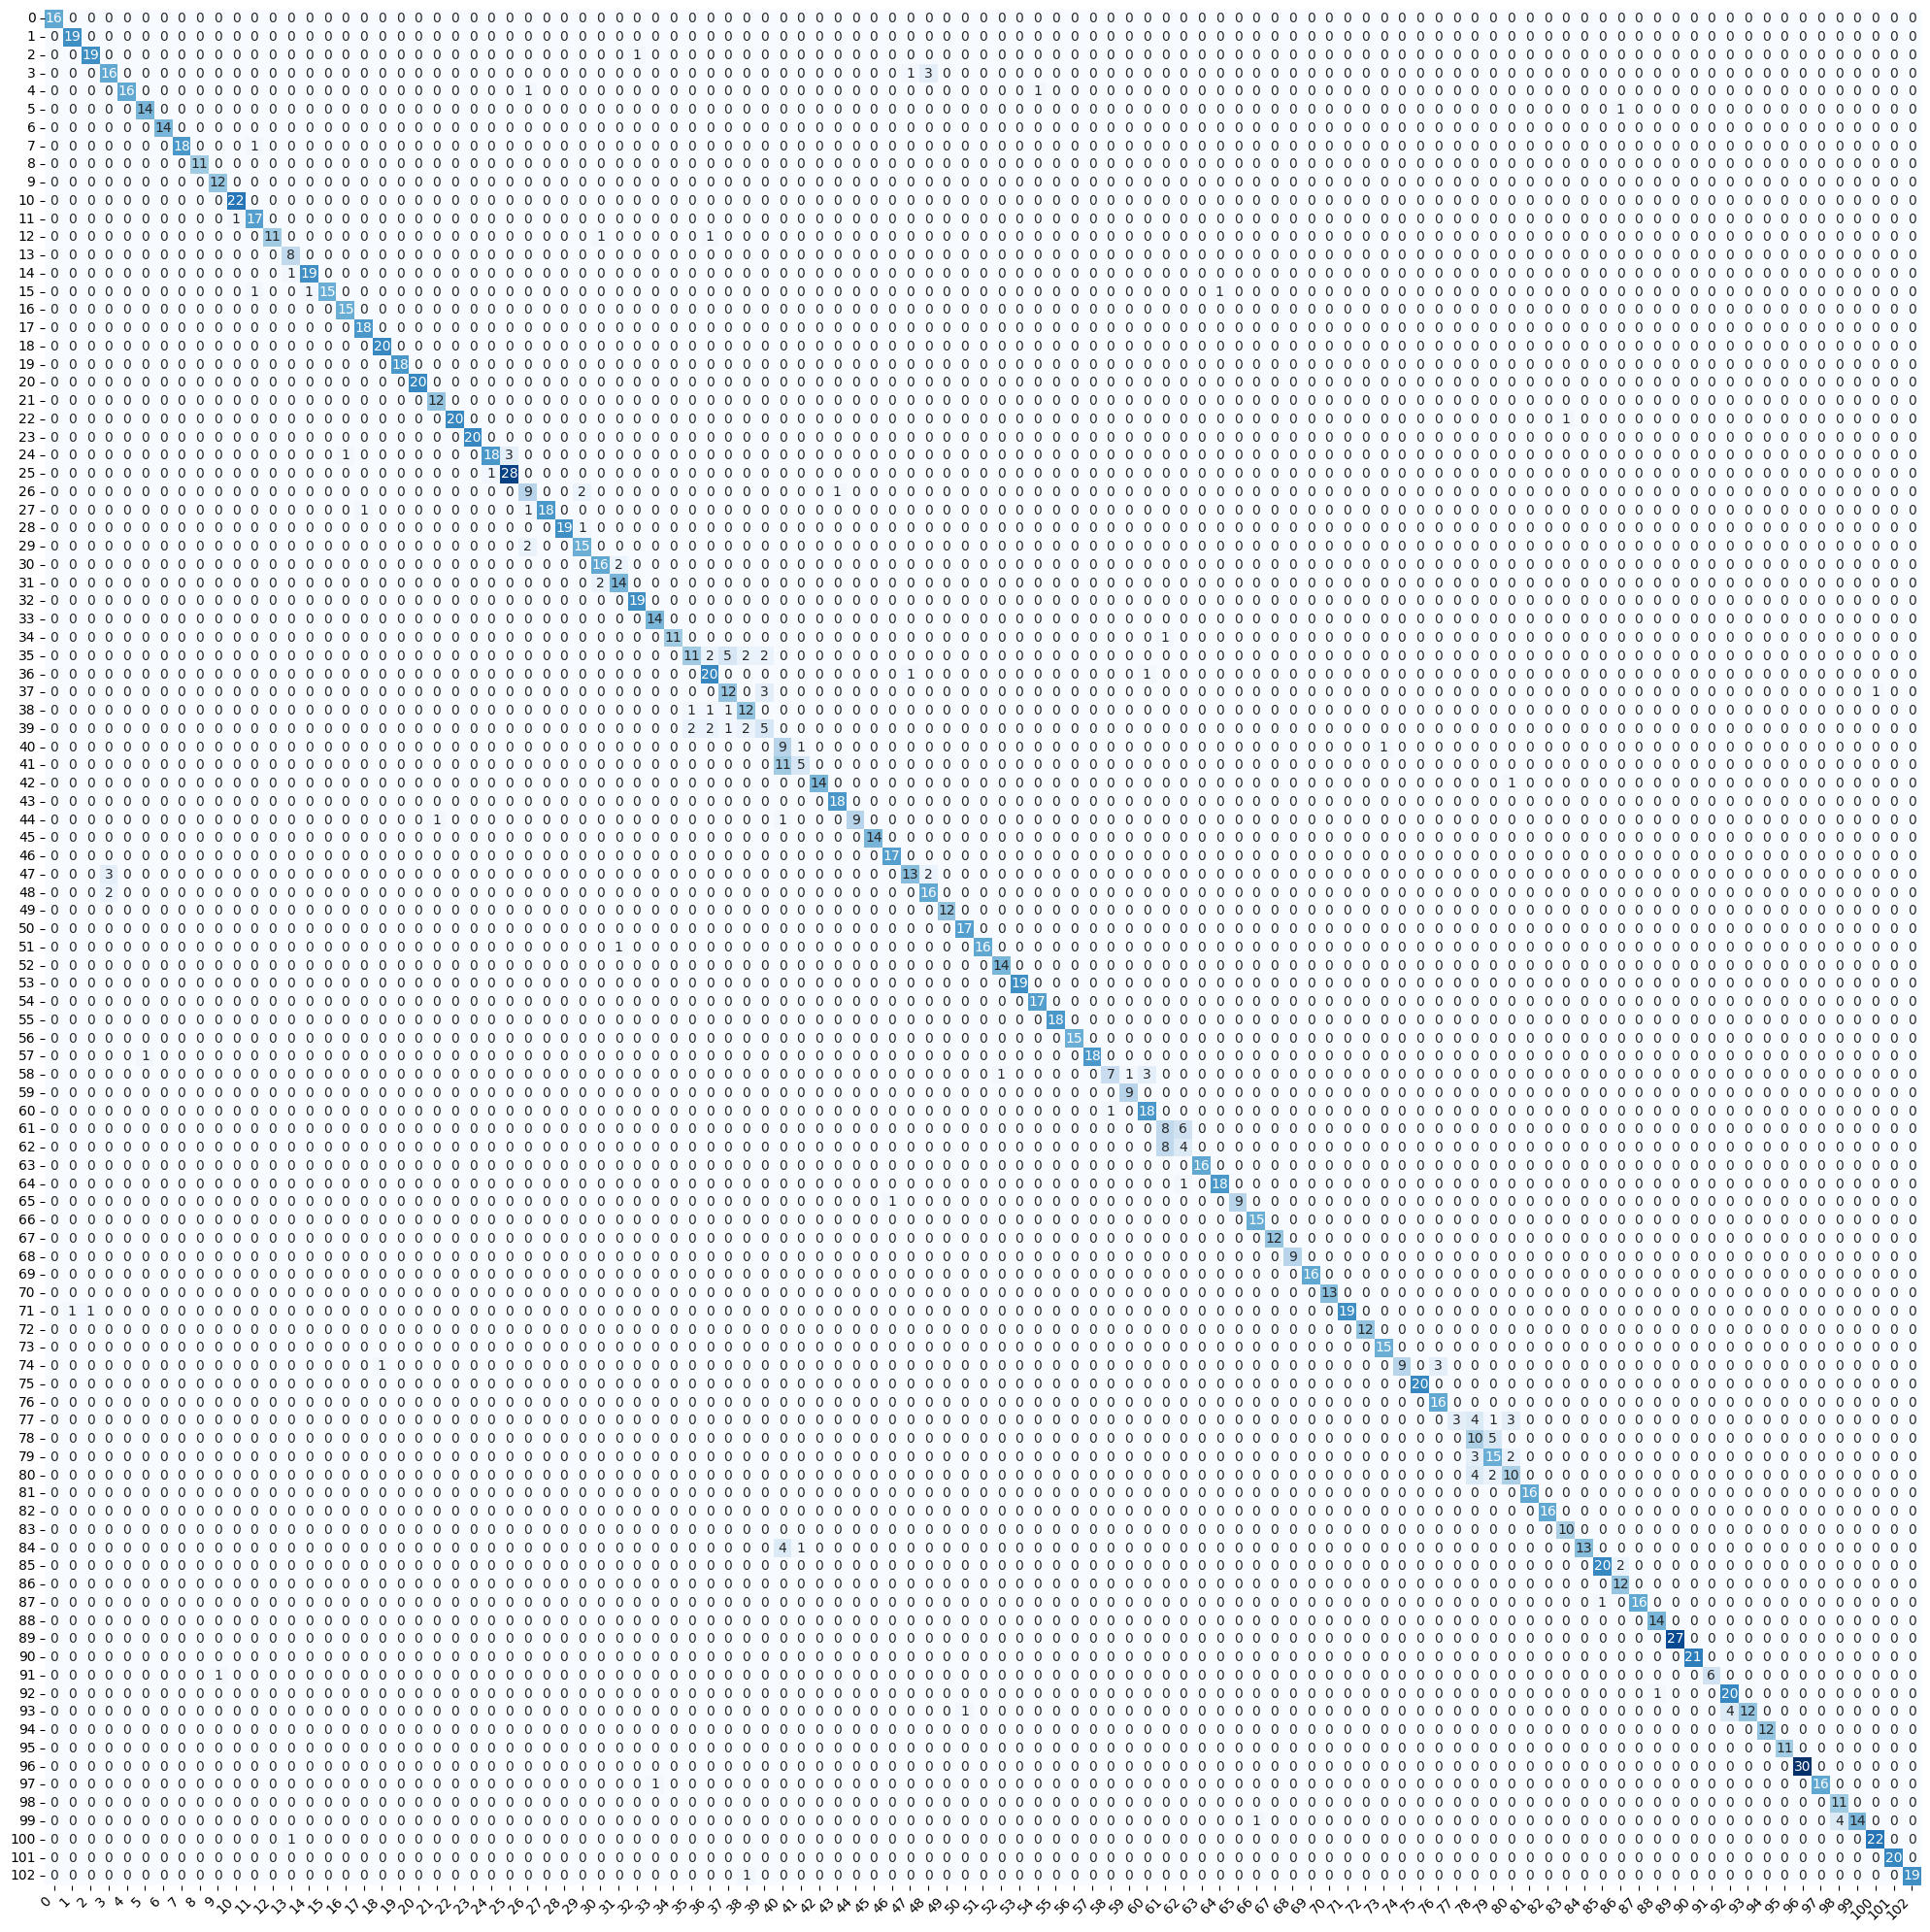

In [ ]:
import seaborn as sns

interp = ClassificationInterpretation.from_learner(model)

plt.figure(figsize=(20, 20))
ax = plt.gca()
sns.heatmap(interp.confusion_matrix(), annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=0)

plt.tight_layout()

plt.show()

In [ ]:
# Access the 10th vocab item (index 9 since indexing is 0-based)
vocab_item = dls.train.vocab[78]

print(vocab_item)

Pteropus giganteus


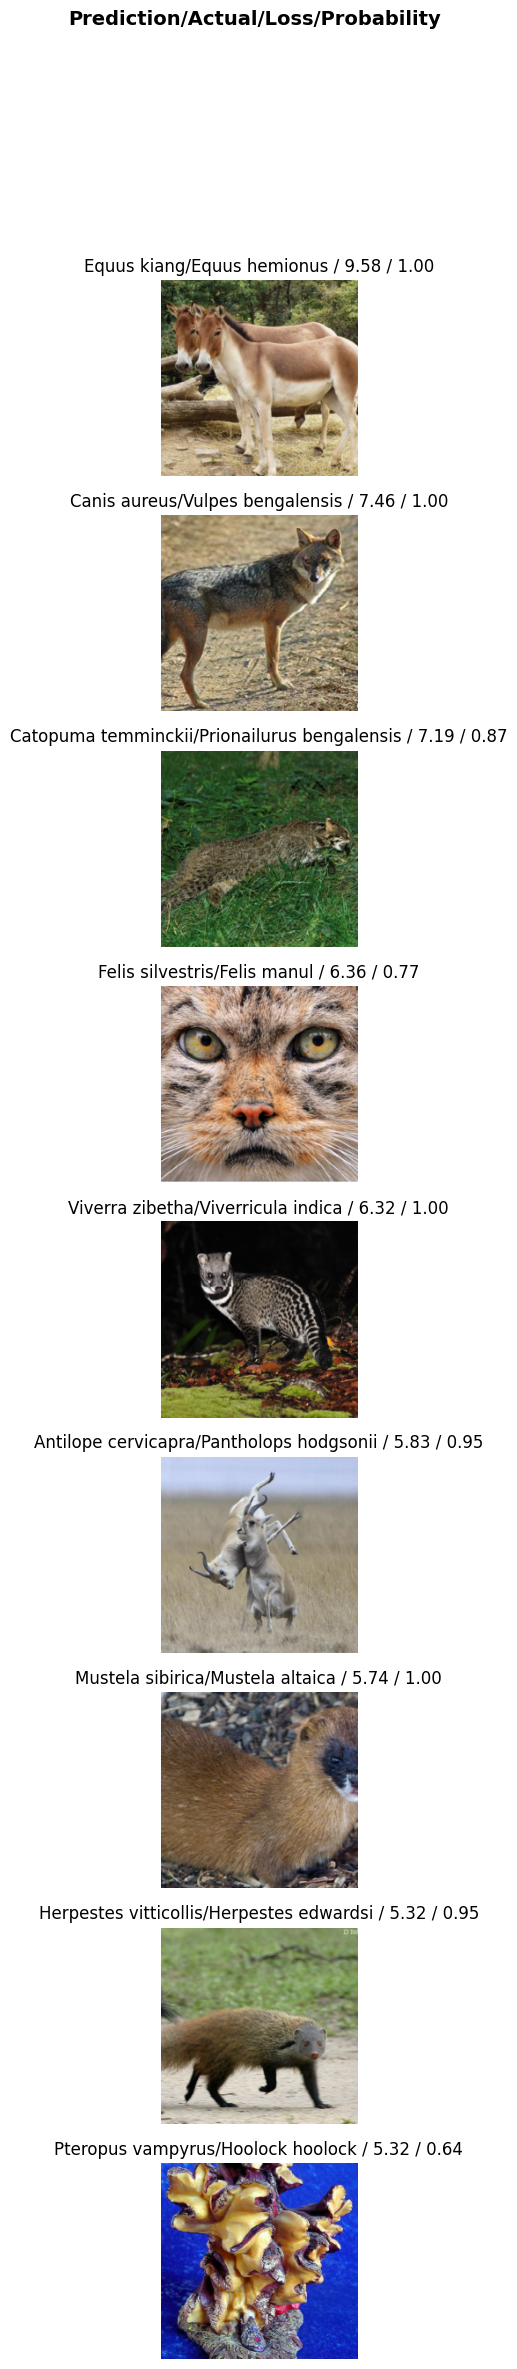

In [ ]:
interp.plot_top_losses(9, nrows = 9)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
cleaner.delete()
cleaner.change()

(#6) [(0, 'Viverra zibetha'),(1, 'Viverra zibetha'),(2, 'Viverra zibetha'),(11, 'Viverra zibetha'),(12, 'Viverra zibetha'),(18, 'Viverra zibetha')]

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_dir}/{cat}")

In [ ]:
dls.train.show_batch(max_n = 8, nrows = 4)

In [ ]:
dls.train.vocab

['Acinonyx jubatus', 'Ailurus fulgens', 'Antilope cervicapra', 'Aonyx cinereus', 'Arctictis binturong', 'Axis porcinus', 'Bos frontalis', 'Bos grunniens', 'Bos taurus', 'Boselaphus tragocamelus', 'Bubalus bubalis', 'Budorcas taxicolor', 'Callosciurus erythraeus', 'Canis aureus', 'Canis lupus', 'Capra falconeri', 'Capra sibirica', 'Caracal caracal', 'Catopuma temminckii', 'Cervus elaphus', 'Cuon alpinus', 'Cynopterus sphinx', 'Dicerorhinus sumatrensis', 'Elephas maximus', 'Equus hemionus', 'Equus kiang', 'Felis catus', 'Felis chaus', 'Felis manul', 'Felis silvestris', 'Funambulus palmarum', 'Funambulus pennantii', 'Gazella bennettii', 'Helarctos malayanus', 'Hemitragus jemlahicus', 'Herpestes edwardsi', 'Herpestes javanicus', 'Herpestes smithii', 'Herpestes urva', 'Herpestes vitticollis', 'Hipposideros ater', 'Hipposideros speoris', 'Hoolock hoolock', 'Hyaena hyaena', 'Kerivoula picta', 'Lepus nigricollis', 'Loris lydekkerianus', 'Lutra lutra', 'Lutrogale perspicillata', 'Lynx lynx', 'M

In [ ]:
train_len = len(dls.train)
valid_len = len(dls.valid)

print(f"Training DataLoader Length: {train_len}")
print(f"Validation DataLoader Length: {valid_len}")

Training DataLoader Length: 477
Validation DataLoader Length: 53


Training the model with Fastai

In [ ]:
from fastai.callback.tracker import SaveModelCallback
save_callback = SaveModelCallback(monitor='valid_loss')

In [ ]:
learner.fine_tune(1, cbs=[SaveModelCallback()])

epoch,train_loss,valid_loss,accuracy,time
0,1.996745,1.713500,0.611848,31:11


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 0 with valid_loss value: 1.713499903678894.


epoch,train_loss,valid_loss,accuracy,time
0,1.028989,0.920116,0.735927,02:23


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 0 with valid_loss value: 0.9201155304908752.


In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0004786300996784121, valley=0.0002754228771664202)

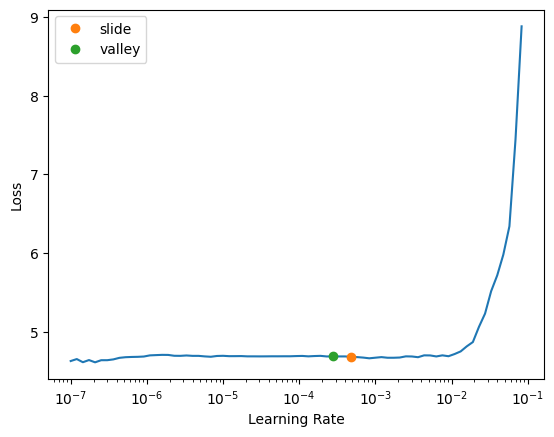

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
import math

slide = 0.0004786300996784121
valley = 0.0002754228771664202

log_slide = math.log10(slide)
log_valley = math.log10(valley)

lr_max = slice(10**(log_valley), 10**(log_slide))

lr_max

slice(0.00027542287716642006, 0.0004786300996784123, None)

In [ ]:
learner.fit_one_cycle(2, slice(0.00027542287716642006, 0.0004786300996784123, None))

epoch,train_loss,valid_loss,accuracy,time
0,1.311660,1.141362,0.674419,02:08
1,0.950136,0.938256,0.736434,02:07


In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0004786300996784121, valley=2.2908675418875646e-06)

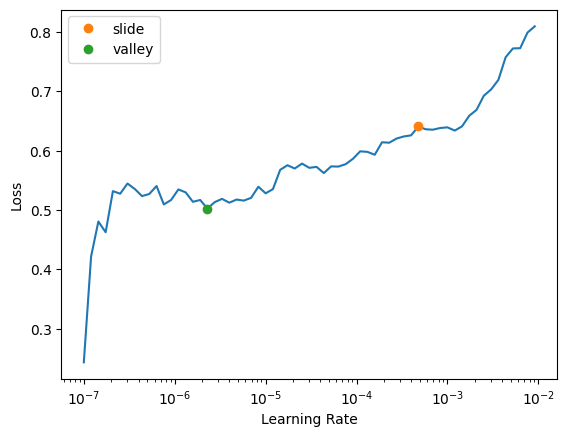

In [ ]:
from fastai.callback.schedule import slide, valley

learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
import math

slide = 0.0004786300996784121
valley = 2.2908675418875646e-06

log_slide = math.log10(slide)
log_valley = math.log10(valley)

lr_max = slice(10**(log_valley), 10**(log_slide))

lr_max

slice(2.2908675418875646e-06, 0.0004786300996784123, None)

In [ ]:
learner.fit_one_cycle(5, slice(0.000229086770559661, 0.00033113113022409363, None))

epoch,train_loss,valid_loss,accuracy,time
0,0.907785,0.936479,0.730471,02:08
1,0.904235,0.883822,0.731664,02:07
2,0.726064,0.831567,0.745379,02:07
3,0.680353,0.784831,0.759690,02:07
4,0.591377,0.772934,0.759690,02:07


In [ ]:
learner.fit_one_cycle(5, lr_max=lr_max)

epoch,train_loss,valid_loss,accuracy,time
0,0.752010,0.868051,0.731664,02:08
1,0.672025,0.837211,0.748956,02:07
2,0.647582,0.819745,0.750149,02:07
3,0.542798,0.753766,0.769827,02:07
4,0.519823,0.739854,0.766249,02:07


In [ ]:
learner.save("fastai_version_acc0.766249")

Path('models/fastai_version_acc0.766249.pth')